## 最急降下法をスクラッチで作成

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### データ準備

In [2]:
df = pd.read_csv('data.csv')
df

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674
5,51,16.068166
6,55,23.183599
7,62,22.212595
8,83,29.357010
9,103,37.565129


### データの可視化

<AxesSubplot:xlabel='space', ylabel='rent'>

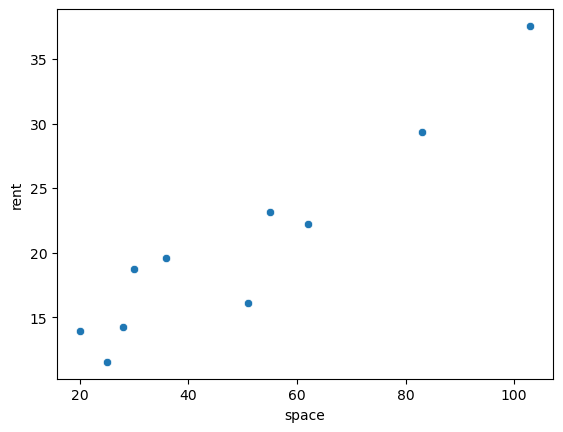

In [3]:
sns.scatterplot(x=df['space'], y=df['rent'])

### 最小二乗法 $\frac{1}{m}\sum_{i=1}^{m}\left\{y_i-(\theta_0+\theta_1x_i)\right\}^2$

In [4]:
x = df['space'].values
y = df['rent'].values
theta_0 = 2
theta_1 = 2
# 各データにおける残差（正解値と予測値のズレ）の二乗和
display((y-(theta_0 + theta_1 * x))**2)
# 損失関数を求める
np.mean((y-(theta_0 + theta_1 * x))**2)

array([  786.30756803,  1637.51294114,  1912.3524946 ,  1872.92646121,
        2959.06907917,  7732.00736723,  7888.35316015, 10771.82542796,
       19221.87864528, 29048.04530762])

8383.027845238928

### 損失関数を定義 : $L(\theta_0, \theta_1)=\frac{1}{m}\sum_{i=1}^{m}e_i^2=\frac{1}{m}\sum_{i=1}^{m}\left\{y_i-(\theta_0+\theta_1x_i)\right\}^2$

In [5]:
def loss_func(theta_0, theta_1, x, y):
    return np.mean((y-(theta_0 + theta_1 * x))**2)

In [6]:
loss_func(2, 2, x, y)

8383.027845238928

### 最急降下法

In [7]:
# θ0とθ1の初期値を設定
theta_0_init = -5
theta_1_init = 5

# イテレーションの数
epoch = 10**5

# 学習率
alpha = 0.0001

### $\theta_0$ のパラメータを更新($\theta_1$と同時に更新)
$\theta_0:=\theta_0-\alpha\frac{\partial}{\partial\theta_0}L(\theta_0, \theta_1)$

元々の$\theta_0$に対して$\theta_0$で偏微分した損失関数の勾配ベクトルに学習率をかけて逆方向に進めたものを$\theta_0$に代入

$L(\theta_0, \theta_1)$にMSE($\frac{1}{m}\sum_{i=1}^{m}\left\{y_i-(\theta_0+\theta_1x_i)\right\}^2$)を代入


#### $\frac{\partial}{\partial\theta_0}L(\theta_0, \theta_1)$ = $\frac{2}{m}\sum_{i=1}^{m}(\theta_0+\theta_1x_i-y_i)$

In [8]:
def update_theta0(theta_0, theta_1, x, y, alpha=0.001):
    return theta_0 - alpha * 2 * np.mean((theta_0 + theta_1 * x) - y)

In [9]:
update_theta0(theta_0_init, theta_1_init, x, y)

-5.441705194308961

### $\theta_1$ のパラメータ更新($\theta_0$と同時に更新)
$\theta_1:=\theta_1-\alpha\frac{\partial}{\partial\theta_1}L(\theta_0, \theta_1)$

元々の$\theta_1$に対して$\theta_1$で偏微分した損失関数の勾配ベクトルに学習率をかけて逆方向に進めたものを$\theta_1$に代入


#### $\frac{\partial}{\partial\theta_1}L(\theta_0, \theta_1)$ = $\frac{2}{m}\sum_{i=1}^{m}(\theta_0+\theta_1x_i-y_i)x_i$

In [10]:
def update_theta1(theta_0, theta_1, x, y, alpha=0.001):
    return theta_1 - alpha * 2 * np.mean(((theta_0 + theta_1 * x) - y) * x)

In [11]:
update_theta1(theta_0_init, theta_1_init, x, y)

-23.077591803644445

### $\theta_0$と$\theta_1$をイテレーションにより更新

In [12]:
theta_0_hist = []
theta_1_hist = []
# 初期化
theta_0_hist.append(theta_0_init)
theta_1_hist.append(theta_1_init)

for _ in range(epoch):
    update_theta_0 = update_theta0(theta_0_hist[-1], theta_1_hist[-1], x=x, y=y, alpha=alpha)
    update_theta_1 = update_theta1(theta_0_hist[-1], theta_1_hist[-1], x=x, y=y, alpha=alpha)
    theta_0_hist.append(update_theta_0)
    theta_1_hist.append(update_theta_1)

In [13]:
theta_0_hist[-1]

6.931908077506691

In [14]:
theta_1_hist[-1]

0.277487357683134

### 最急降下法の結果の推移

In [15]:
rent_cost = [loss_func(*param, x=x, y=y) for param in zip(theta_0_hist, theta_1_hist)]

In [16]:
rent_cost[-1]

6.143987788093325

### 最適なパラメータを使った回帰モデルの直線を描画

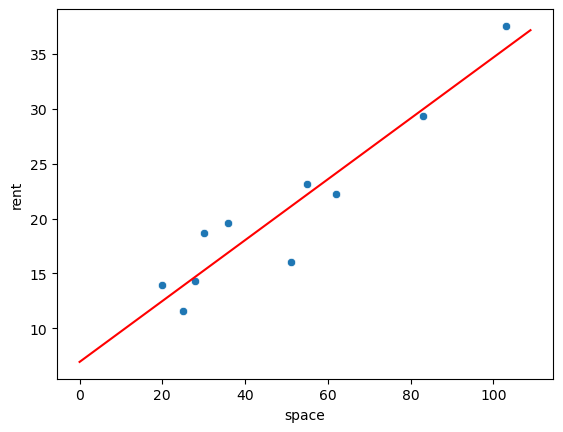

In [17]:
sns.scatterplot(x=df['space'], y=df['rent'])
x_values = np.arange(110)
y_values = theta_0_hist[-1] + theta_1_hist[-1]*x_values
plt.plot(x_values, y_values, '-', color='r')

### 予測してみる
$y=\theta_0+\theta_1x$

In [20]:
space = 20
rent = theta_0_hist[-1] + theta_1_hist[-1]*space
print(rent)

12.48165523116937
